# Health indicator for Morocco

 Data are from the United Nations Population Division, World Health Organization, United Nations Children's Fund, the Joint United Nations Programme on HIV/AIDS, and various other sources.

# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## Data Acquisition

## Load the dataset

In [2]:
# Load csv dataset into a pandas dataframe
df = pd.read_csv('health_mar.csv', index_col=False)

# Customize display of rows in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# five row of data
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,50.8
2,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,23.6
3,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,49.5
4,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,49.4


In [3]:
df.drop(0, inplace=True)
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,50.8
2,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,23.6
3,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,49.5
4,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,49.4
5,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,63.9


## Basic insight from the data set 

## Columns

In [4]:
# Let chack the columns of dataset
df.columns.tolist()

['Country Name',
 'Country ISO3',
 'Year',
 'Indicator Name',
 'Indicator Code',
 'Value']

## Data types

In [5]:
# Check the data type of data frame by .dtypes
df.dtypes

Country Name      object
Country ISO3      object
Year              object
Indicator Name    object
Indicator Code    object
Value             object
dtype: object

## Statistical summary of each column

In [6]:

df.describe()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
count,8618,8618,8618,8618,8618,8618
unique,1,1,64,562,562,6935
top,Morocco,MAR,2004,Net migration,SM.POP.NETM,0.1
freq,8618,8618,498,64,64,96


## Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 1 to 8618
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    8618 non-null   object
 1   Country ISO3    8618 non-null   object
 2   Year            8618 non-null   object
 3   Indicator Name  8618 non-null   object
 4   Indicator Code  8618 non-null   object
 5   Value           8618 non-null   object
dtypes: object(6)
memory usage: 404.1+ KB


In [8]:
print(f'Dataset includes {df.shape[0]} rows and {df.shape[1]} columns')

Dataset includes 8618 rows and 6 columns


In [9]:
# Checking data 
df[df['Indicator Name'] == 'Life expectancy at birth, total (years)'].head()
df[df['Indicator Name'] == 'Population ages 15-64, total'].head()
df[df['Indicator Name'] == 'Population ages 65 and above, total']
df['Indicator Name'].value_counts().head(20)


Indicator Name
Net migration                                                64
Population ages 30-34, male (% of male population)           63
Population ages 70-74, female (% of female population)       63
Population ages 05-09, female (% of female population)       63
Population ages 0-14 (% of total population)                 63
Population ages 0-14, total                                  63
Population ages 0-14, male (% of male population)            63
Population ages 0-14, male                                   63
Population ages 0-14, female (% of female population)        63
Population ages 0-14, female                                 63
Population ages 00-04, male (% of male population)           63
Population ages 00-04, female (% of female population)       63
Population ages 65 and above, male (% of male population)    63
Population ages 65 and above, total                          63
Population ages 65 and above (% of total population)         63
Refugee population by cou

# Data Wrangling

Let convert the data from an initial format to a format that may be better to analyze

## Identify missing value

In [10]:
# Create a list of null value and iterate within it  to check any empty field
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Country Name
Country Name
False    8618
Name: count, dtype: int64

Country ISO3
Country ISO3
False    8618
Name: count, dtype: int64

Year
Year
False    8618
Name: count, dtype: int64

Indicator Name
Indicator Name
False    8618
Name: count, dtype: int64

Indicator Code
Indicator Code
False    8618
Name: count, dtype: int64

Value
Value
False    8618
Name: count, dtype: int64



The output above shows that there are not  missing value in dataset

## Correct the data format

In [11]:
# 'Value' column has a numerical values but should have type of 'float' or 'int'

print(df['Value'].dtype)
df['Value'] = df['Value'].astype('float')
print(df['Value'].dtype)


object
float64


In [12]:
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,50.8
2,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,23.6
3,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,49.5
4,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,49.4
5,Morocco,MAR,2004,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,63.9


# Data Explonatory

In [13]:
# df[df['Indicator Name']=='Population, total']['Value'].item()
df.sort_values('Year', inplace=True)

In [14]:
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
4718,Morocco,MAR,1960,"Population ages 15-64, male",SP.POP.1564.MA.IN,3.013599e+06
5285,Morocco,MAR,1960,"Population ages 30-34, male (% of male populat...",SP.POP.3034.MA.5Y,7.221266e+00
5600,Morocco,MAR,1960,"Population ages 45-49, female (% of female pop...",SP.POP.4549.FE.5Y,2.931806e+00
3631,Morocco,MAR,1960,"Survival to age 65, male (% of cohort)",SP.DYN.TO65.MA.ZS,2.880188e+01
6419,Morocco,MAR,1960,"Population ages 65 and above, male (% of male ...",SP.POP.65UP.MA.ZS,2.565647e+00


### Demographic evolution From 1960 to 2022

In [15]:
# Fetch only 'population, total' from 'Indicator Name' column
population = df[df['Indicator Name'] == 'Population, total']
population.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
7299,Morocco,MAR,1960,"Population, total",SP.POP.TOTL,11769774.0
7298,Morocco,MAR,1961,"Population, total",SP.POP.TOTL,12081713.0
7297,Morocco,MAR,1962,"Population, total",SP.POP.TOTL,12404757.0
7296,Morocco,MAR,1963,"Population, total",SP.POP.TOTL,12726686.0
7295,Morocco,MAR,1964,"Population, total",SP.POP.TOTL,13044254.0


Text(0.5, 0, 'Years')

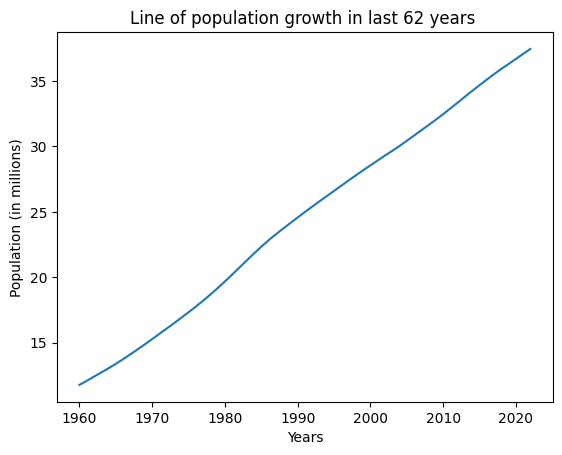

In [16]:
# Normalize population total for plotting
population['Value'] = population['Value'] / 1000000

# using line plot to display the total of population vs years
population.groupby(population['Year'])['Value'].sum().plot()
plt.title('Line of population growth in last 62 years ')
plt.ylabel('Population (in millions)')
plt.xlabel('Years')

In [17]:
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
4718,Morocco,MAR,1960,"Population ages 15-64, male",SP.POP.1564.MA.IN,3.013599e+06
5285,Morocco,MAR,1960,"Population ages 30-34, male (% of male populat...",SP.POP.3034.MA.5Y,7.221266e+00
5600,Morocco,MAR,1960,"Population ages 45-49, female (% of female pop...",SP.POP.4549.FE.5Y,2.931806e+00
3631,Morocco,MAR,1960,"Survival to age 65, male (% of cohort)",SP.DYN.TO65.MA.ZS,2.880188e+01
6419,Morocco,MAR,1960,"Population ages 65 and above, male (% of male ...",SP.POP.65UP.MA.ZS,2.565647e+00


In [18]:
population_gender = df.loc[(df['Indicator Name'] == "Population, male")| (df['Indicator Name'] == "Population, female")]

population_gender.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
7488,Morocco,MAR,1960,"Population, male",SP.POP.TOTL.MA.IN,5875029.0
7362,Morocco,MAR,1960,"Population, female",SP.POP.TOTL.FE.IN,5894745.0
7487,Morocco,MAR,1961,"Population, male",SP.POP.TOTL.MA.IN,6033311.0
7361,Morocco,MAR,1961,"Population, female",SP.POP.TOTL.FE.IN,6048401.0
7360,Morocco,MAR,1962,"Population, female",SP.POP.TOTL.FE.IN,6208208.0


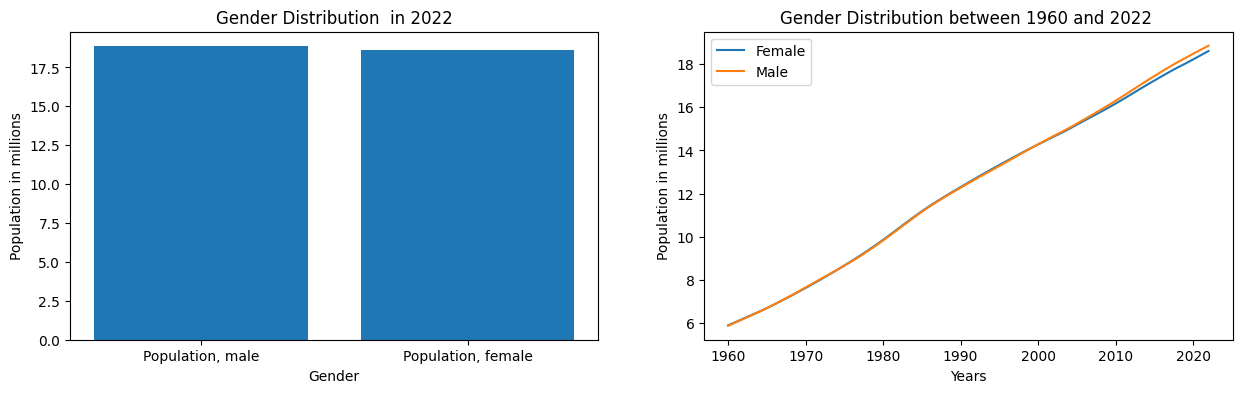

In [19]:
# Population value of gender needs to be nomarlized
population_gender['Value'] = population_gender['Value'].astype(int)
population_gender['Value'] = population_gender['Value'] / 1000000

fig , axe = plt.subplots(1,2, figsize = (15, 4))
axe[0].bar(population_gender['Indicator Name'],  population_gender['Value'] )
axe[0].set_title('Gender Distribution  in 2022')
axe[0].set_ylabel('Population in millions')
axe[0].set_xlabel('Gender')

year = np.arange(1960, 2023)

axe[1].plot(year,  population_gender['Value'][population_gender['Indicator Name'] == 'Population, female'] )
axe[1].plot(year,  population_gender['Value'][population_gender['Indicator Name'] == 'Population, male'] )
axe[1].set_title('Gender Distribution between 1960 and 2022 ')
axe[1].set_ylabel('Population in millions')
axe[1].set_xlabel('Years')
axe[1].legend(['Female', 'Male'])


We notice  that male and female lines are closely increased with small decline of female growth in last ten years

In [20]:
# let look for rows in which includes Population 

df_population = df[df['Indicator Name'].str.contains("Population")]

df_population.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
4718,Morocco,MAR,1960,"Population ages 15-64, male",SP.POP.1564.MA.IN,3.013599e+06
5285,Morocco,MAR,1960,"Population ages 30-34, male (% of male populat...",SP.POP.3034.MA.5Y,7.221266e+00
5600,Morocco,MAR,1960,"Population ages 45-49, female (% of female pop...",SP.POP.4549.FE.5Y,2.931806e+00
6419,Morocco,MAR,1960,"Population ages 65 and above, male (% of male ...",SP.POP.65UP.MA.ZS,2.565647e+00
7488,Morocco,MAR,1960,"Population, male",SP.POP.TOTL.MA.IN,5.875029e+06


We need to display the population differences based on age range

Text(0.5, 0, 'Years')

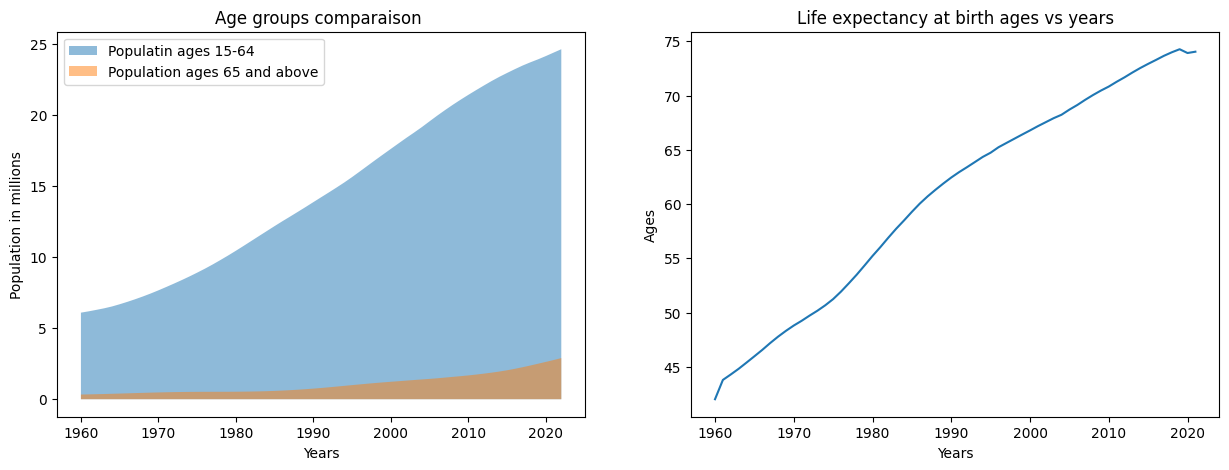

In [21]:
# filter the dataset and get only population ages 15-64 and population ages 64 and above ranges

population_agegroup = df.loc[(df['Indicator Name'] == "Population ages 15-64, total") | (df['Indicator Name'] == "Population ages 65 and above, total")]

# Nomalize value of ranges from millions to tens
population_agegroup['Value'] = population_agegroup['Value'] / 1000000

# Create a double axes to plot box plot and pie plot
fig , axe = plt.subplots(1,2, figsize = (15,5))

axe[0].fill_between(year,  population_agegroup['Value'][population_agegroup['Indicator Name'] == 'Population ages 15-64, total'], alpha=.5 )

axe[0].fill_between(year,  population_agegroup['Value'][population_agegroup['Indicator Name'] == 'Population ages 65 and above, total'] , alpha=.5)

axe[0].set_title('Age groups comparaison ')

axe[0].set_ylabel('Population in millions')

axe[0].set_xlabel('Years')

axe[0].legend(['Populatin ages 15-64', 'Population ages 65 and above'], loc = 2)

# let plot the life expectency at birth of total population
year = np.arange(1960, 2022)

axe[1].plot(year,  df['Value'][df['Indicator Name'] == 'Life expectancy at birth, total (years)'] )

axe[1].set_title('Life expectancy at birth ages vs years')

axe[1].set_ylabel('Ages')

axe[1].set_xlabel('Years')



## Mortality and Diseases

### Mortality based on Demographic criteria

In [22]:
# First we need to filter the dataset and remain only the rows which include mortality 

mortality = df[df['Indicator Name'].str.contains('Mortality')]

# th frequency of rows in this group
mortality['Indicator Name'].value_counts()  

Indicator Name
Mortality rate, infant, female (per 1,000 live births)                                                                        62
Mortality rate, under-5, male (per 1,000 live births)                                                                         62
Mortality rate, neonatal (per 1,000 live births)                                                                              62
Mortality rate, adult, female (per 1,000 female adults)                                                                       62
Mortality rate, infant (per 1,000 live births)                                                                                62
Mortality rate, under-5, female (per 1,000 live births)                                                                       62
Mortality rate, infant, male (per 1,000 live births)                                                                          62
Mortality rate, under-5 (per 1,000 live births)                                   

In [23]:
mortality_female = mortality['Value'][mortality['Indicator Name'] == 'Mortality rate, adult, female (per 1,000 female adults)'].tail(10)
mortality_male = mortality['Value'][mortality['Indicator Name'] == 'Mortality rate, adult, male (per 1,000 male adults)'].tail(10)

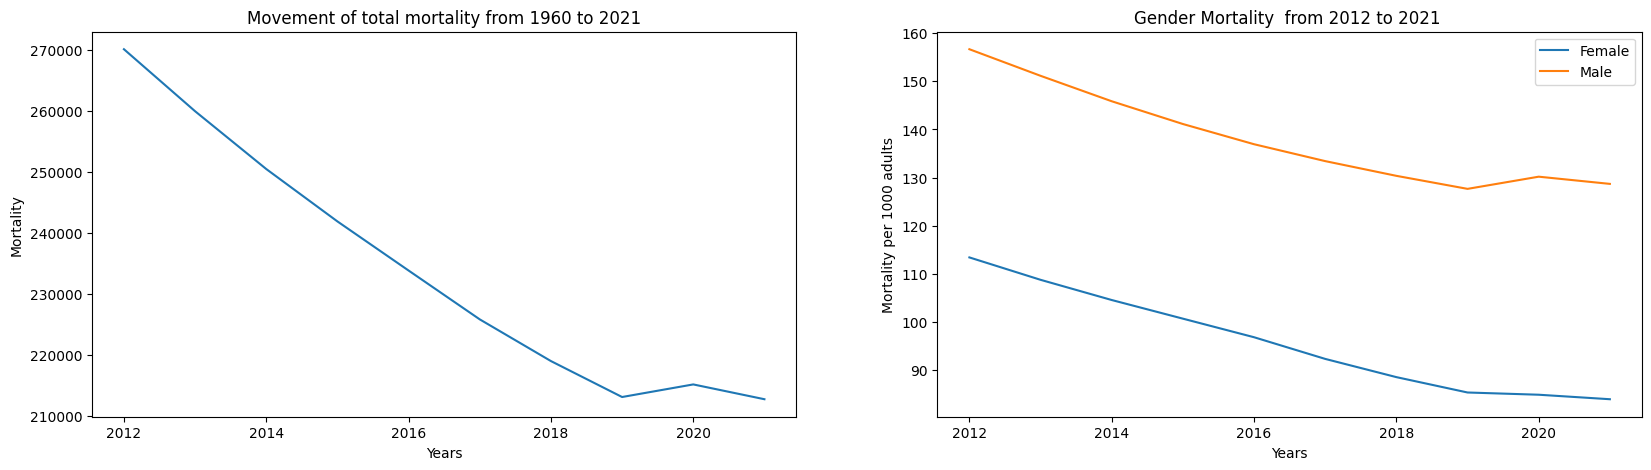

In [24]:
years = np.arange(2012, 2022)

fig , axe = plt.subplots(1,2, figsize = (20,5))

# Calculate the total of Mortality 
total_mortality = (mortality_female.values  + mortality_male.values) * 1000
axe[0].plot(years, total_mortality)
axe[0].set_title('Movement of total mortality from 1960 to 2021')
axe[0].set_xlabel('Years')
axe[0].set_ylabel('Mortality')

# plot male and female mortality 
axe[1].plot(years, mortality_female)
axe[1].plot(years, mortality_male)
axe[1].set_title('Gender Mortality  from 2012 to 2021 ')
axe[1].set_xlabel('Years')
axe[1].set_ylabel('Mortality per 1000 adults')
axe[1].legend([ 'Female', 'Male'])




In [25]:
# let check deseases in indicator name
diseases = df[df['Indicator Name'].str.contains("Cause of death")]


Text(0, 0.5, 'Infant per 1000 birth')

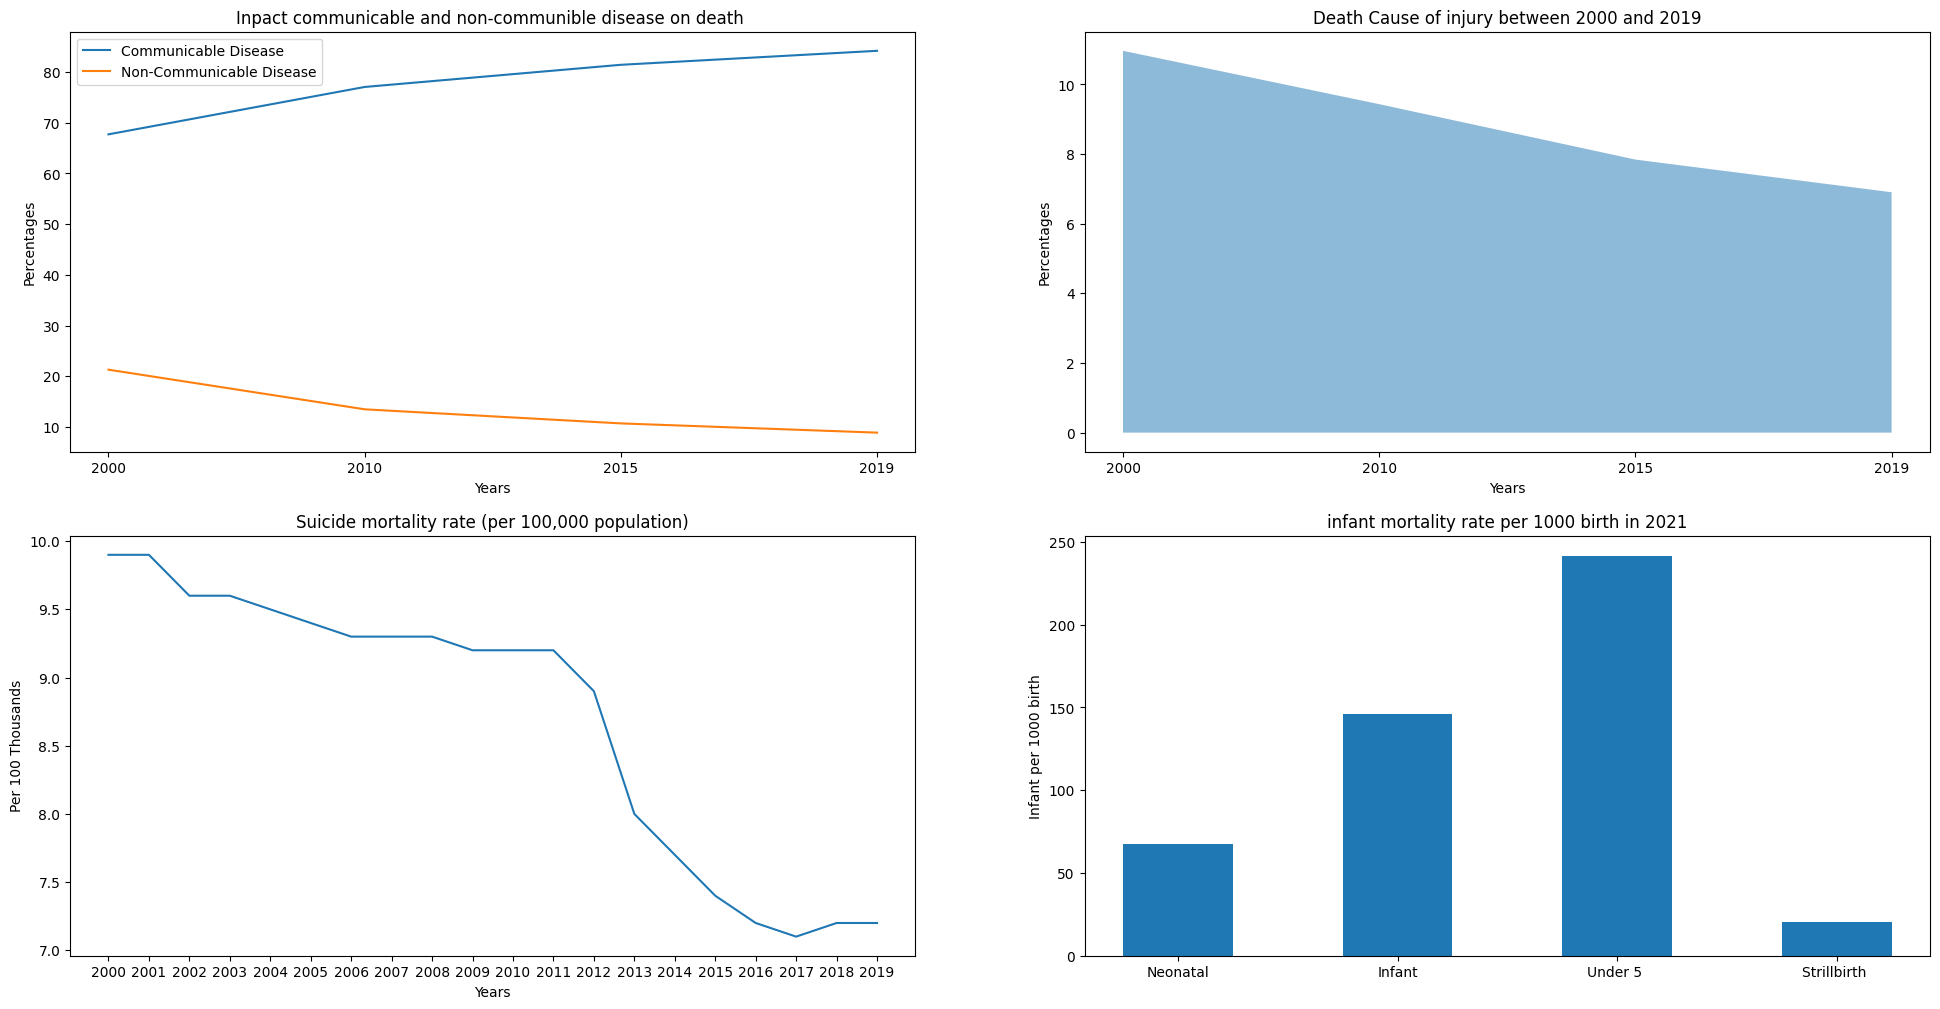

In [26]:
# create a variable that contains only Cause of death 
disease = df.loc[
            (df['Indicator Name'] == 'Cause of death, by injury (% of total)')
            | (df['Indicator Code'] == 'SH.DTH.NCOM.ZS')
            | (df['Indicator Code'] == 'SH.DTH.COMM.ZS')]   
years = disease['Year'].unique()


non_communicable_disease = disease['Value'][disease['Indicator Code'] == 'SH.DTH.NCOM.ZS']
communicable_disease = disease['Value'][disease['Indicator Code'] == 'SH.DTH.COMM.ZS']
injury_disease = disease['Value'][disease['Indicator Name'] == 'Cause of death, by injury (% of total)']

# ploting the dataset 
fig, axe = plt.subplots(2,2, figsize = (24, 12))
axe[0,0].plot(disease['Year'].unique(), non_communicable_disease)
axe[0,0].plot(disease['Year'].unique(), communicable_disease )
axe[0,0].set_title('Inpact communicable and non-communible disease on death ')
axe[0,0].set_xlabel('Years')
axe[0,0].set_ylabel('Percentages')
axe[0,0].legend(['Communicable Disease', 'Non-Communicable Disease'])


axe[0,1].fill_between(disease['Year'].unique(), injury_disease, alpha = 0.5)
axe[0,1].set_title('Death Cause of injury between 2000 and 2019')
axe[0,1].set_xlabel('Years')
axe[0,1].set_ylabel('Percentages')

suicide = df[df['Indicator Name'].str.contains('Suicide')].value_counts()

suicide = df[df['Indicator Name'] == 'Suicide mortality rate (per 100,000 population)']

years = np.arange(2000, 2020).astype('int')
axe[1,0].plot(suicide['Year'], suicide['Value'] )
axe[1,0].set_xticklabels(years.astype(int))
axe[1,0].set_title('Suicide mortality rate (per 100,000 population)')
axe[1,0].set_xlabel('Years')
axe[1,0].set_ylabel('Per 100 Thousands')



# determine mortality rate of neonatal, infant, under 5 and stillbirth from indicator name col
mortality_infant = df.loc[(df['Indicator Name'] == "Mortality rate, neonatal (per 1,000 live births)")
                          |(df['Indicator Name'] == "Mortality rate, infant (per 1,000 live births)")
                          |(df['Indicator Name'] == "Mortality rate, under-5 (per 1,000 live births)")
                          | (df['Indicator Name'] == 'Stillbirth rate (per 1,000 total births)')
                          ]

# 
mortality_infant['Indicator Name'][mortality_infant['Indicator Name'] == "Mortality rate, neonatal (per 1,000 live births)"] = 'Neonatal'
mortality_infant['Indicator Name'][mortality_infant['Indicator Name'] == "Mortality rate, infant (per 1,000 live births)"] = 'Infant'
mortality_infant['Indicator Name'][mortality_infant['Indicator Name'] == "Mortality rate, under-5 (per 1,000 live births)"] = 'Under 5 '
mortality_infant['Indicator Name'][mortality_infant['Indicator Name'] == "Stillbirth rate (per 1,000 total births)"] = 'Strillbirth '

# ploting  mortality_infant dataset
axe[1,1].bar(mortality_infant['Indicator Name'], mortality_infant['Value'], width=.5 )
axe[1,1].set_title('infant mortality rate per 1000 birth in 2021')
axe[1,1].set_ylabel('Infant per 1000 birth')




# Vaccinations

# Services